<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Teguh !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Teguh ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Teguh dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

## Pendahuluan


Pengembangan solusi efisien untuk industri berat merupakan fokus utama Zyfra, sebuah perusahaan yang terlibat dalam teknologi dan inovasi. Dalam upaya untuk meningkatkan efisiensi proses produksi, perusahaan ini berkeinginan untuk mengoptimalkan ekstraksi dan pemurnian bijih emas. Melalui pemanfaatan data terkait proses ekstraksi bijih emas, tujuan utama dari proyek ini adalah membangun sebuah model machine learning yang dapat memprediksi jumlah emas yang diperoleh dari bijih. Dengan model ini diharapkan dapat membantu dalam menciptakan proses produksi yang lebih efisien dengan mengidentifikasi parameter-parameter yang berkontribusi pada hasil yang menguntungkan bagi perusahaan.

Adapun tahapan proses ekstraksi emas yaitu sebagai berikut:

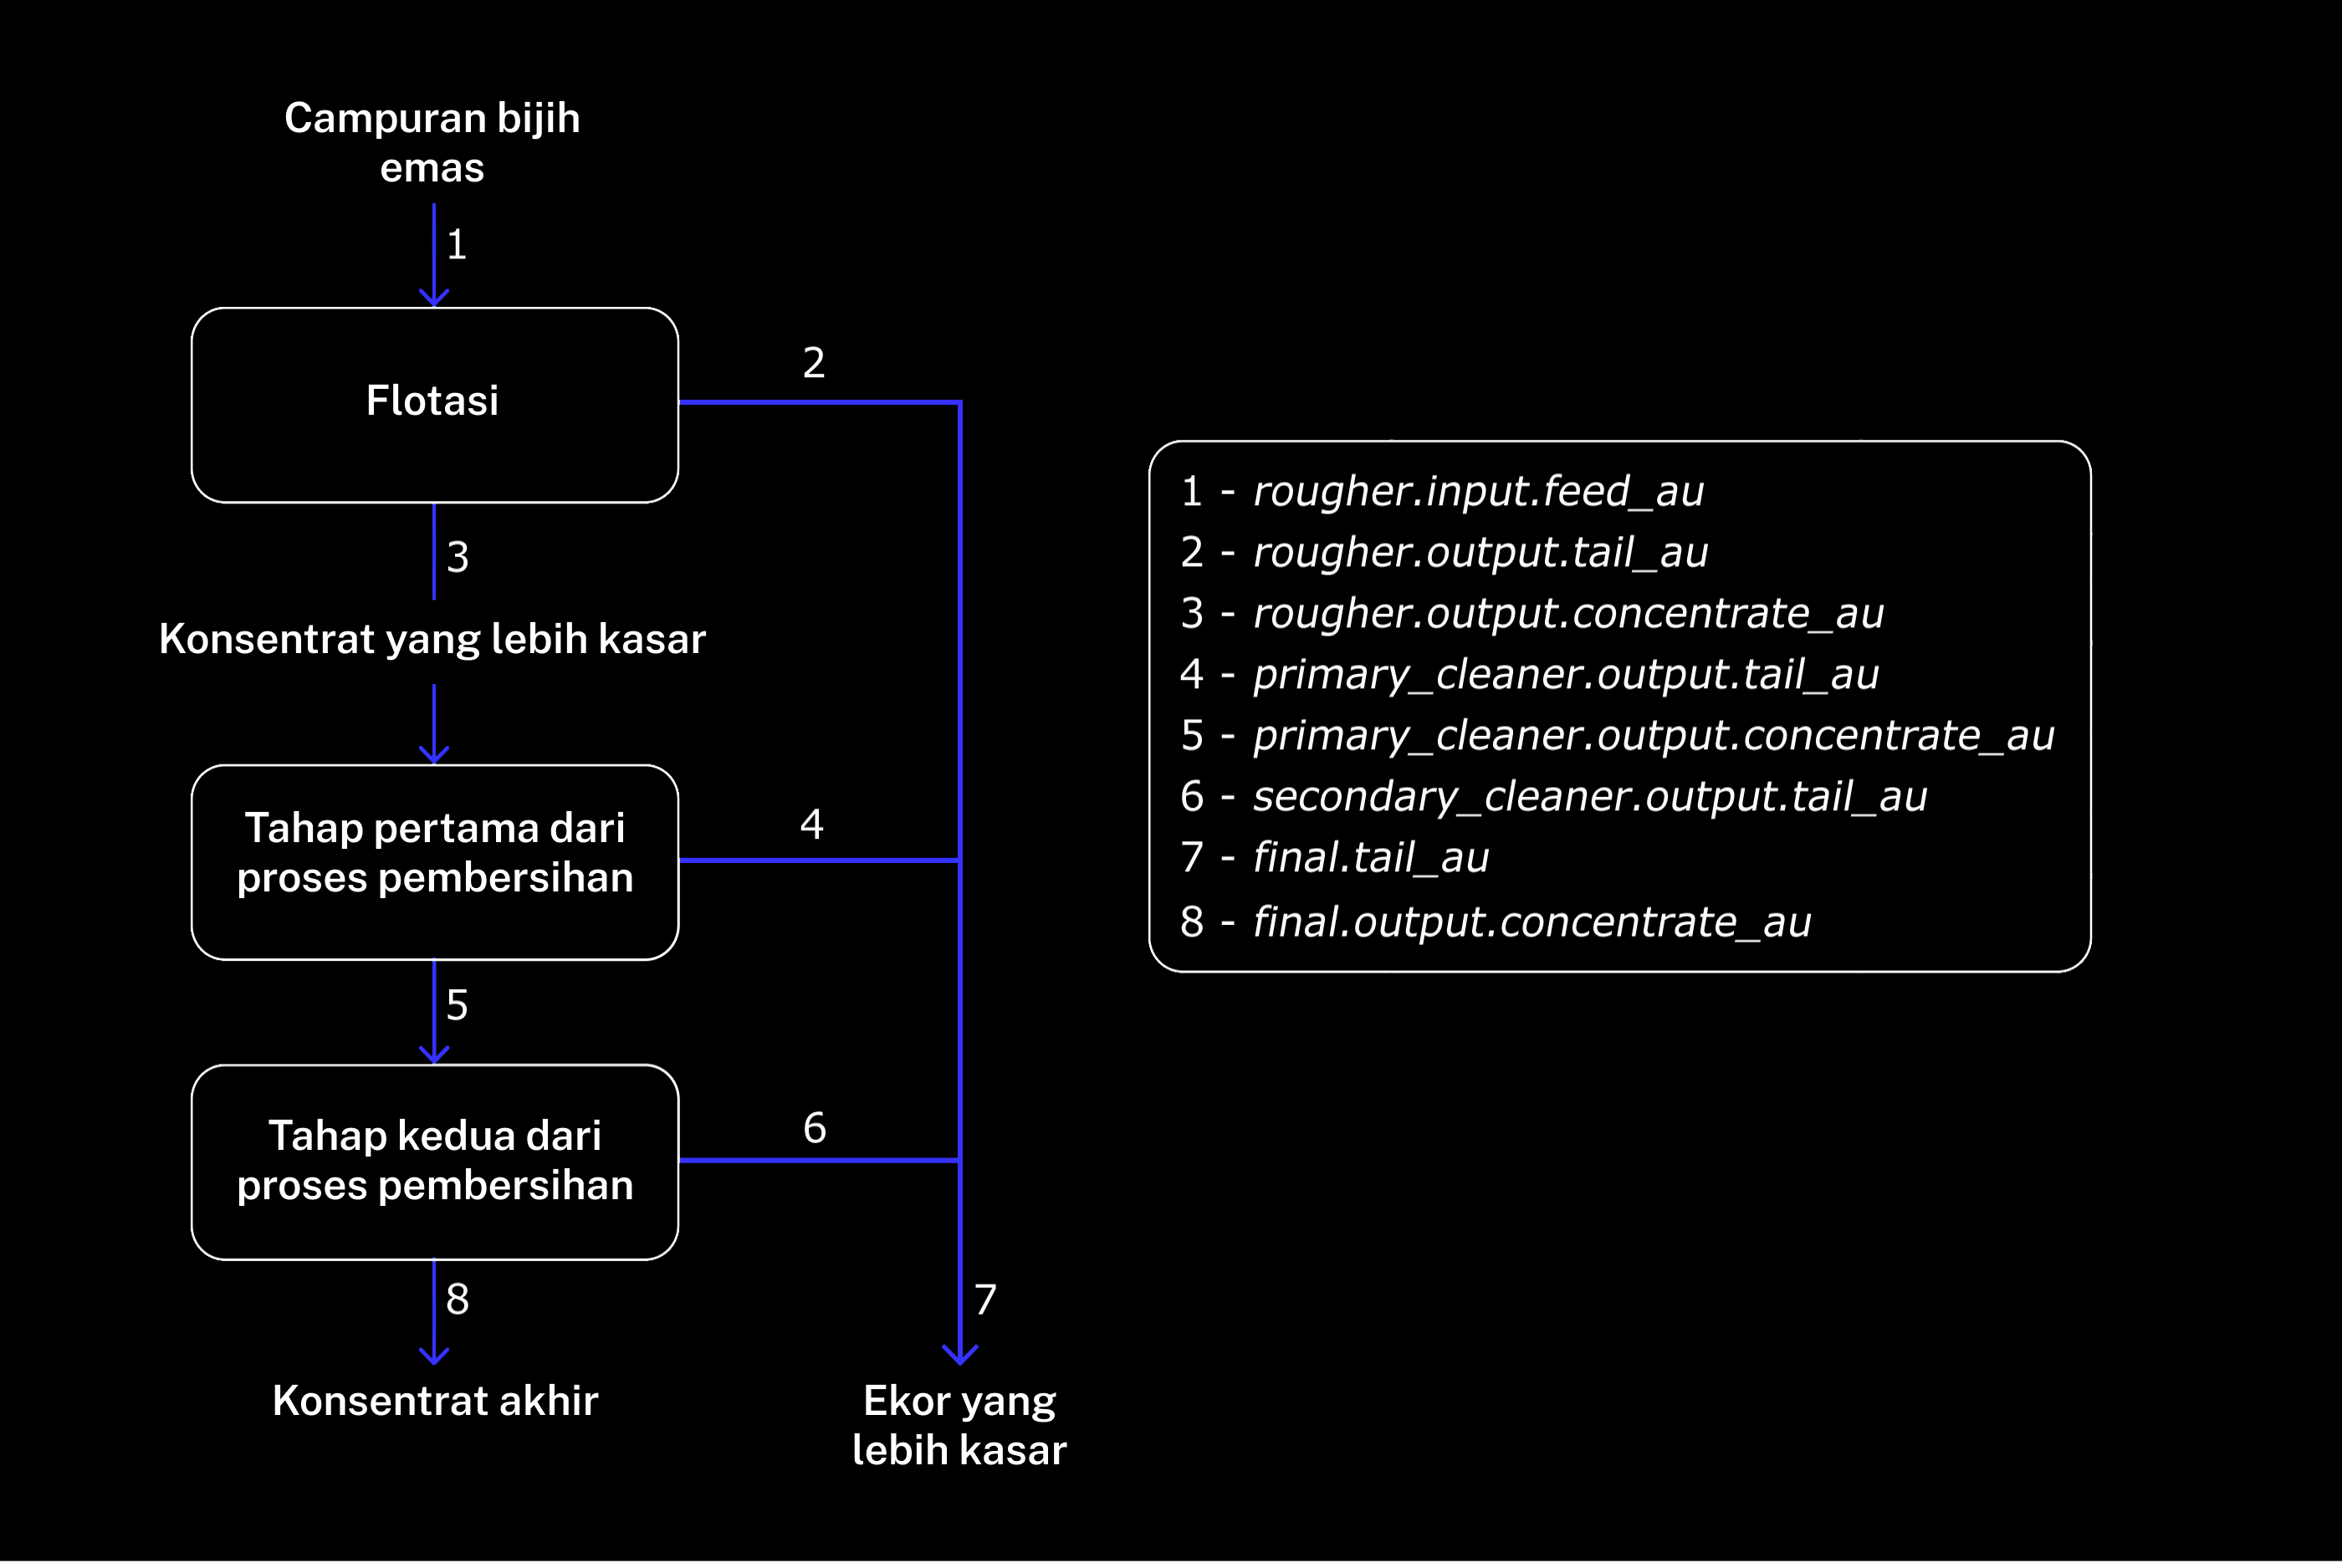

Adapun tugas yang perlu dilakukan adalah memprediksi nilai berikut ini:
- Perolehan konsentrat yang lebih kasar `rougher.output.recovery`
- Perolehan konsentrat akhir `final.output.recovery`

Berdasarkan kedua target tersebut `rougher.output.recovery` dan `final.output.recovery` kita mengetahui perhitungan untuk mendapatkan nilainya, yaitu dengan menggunakan rumus seperti berikut ini:

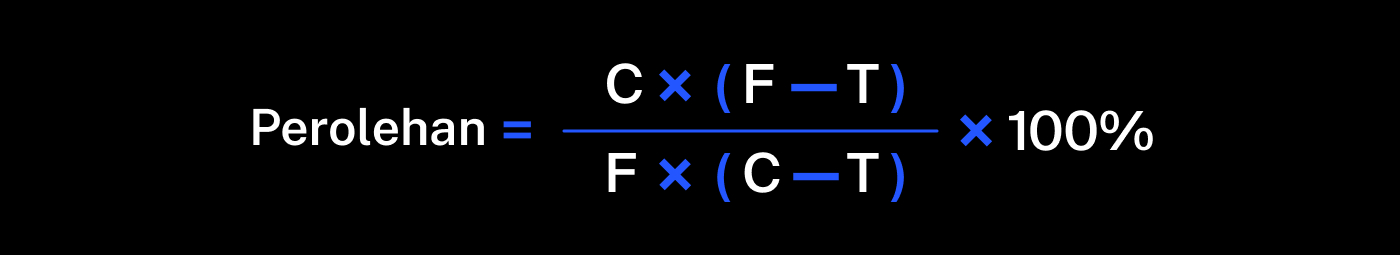


Dengan:
- C — persentase emas dalam konsentrat tepat setelah proses flotasi (untuk menemukan perolehan konsentrat yang lebih kasar) / setelah dilakukan pemurnian (untuk menemukan perolehan konsentrat akhir)
- F — persentase emas dalam feed sebelum proses flotasi (untuk menemukan perolehan konsentrat yang lebih kasar)/ dalam konsentrat tepat setelah proses flotasi (untuk menemukan perolehan konsentrat akhir)
- T — persentase emas dalam ekor yang lebih kasar, tepat setelah proses flotasi (untuk menemukan perolehan konsentrat yang lebih kasar)/setelah dilakukan pemurnian (untuk menemukan perolehan konsentrat akhir)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Memuat Library

In [1]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
#
import timeit
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Memuat dan Pemahaman Data

In [2]:
# memuat dataset
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
dataset = [df_train, df_test, df_full]
# menampilkan informasi data
for i in dataset:
    i.info()
    print(80*'-')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [4]:
display(df_train.head().style.set_caption('Dataset Gold Train'),
        df_test.head().style.set_caption('Dataset Gold Test'),
        df_full.head().style.set_caption('Dataset Gold Full')
       )

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.250000,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.250000,1.002663,8.55

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.250000,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.250000,1.002663,8.55

In [5]:
display(df_train.describe().transpose().style.set_caption('Dataset Gold Train'),
        df_test.describe().transpose().style.set_caption('Dataset Gold Test'),
        df_full.describe().transpose().style.set_caption('Dataset Gold Full')
       )

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,16788.000000,4.716907,2.096718,0.000000,3.971262,4.869346,5.821176,16.001945
final.output.concentrate_pb,16788.000000,9.113559,3.389495,0.000000,8.825748,10.065316,11.054809,17.031899
final.output.concentrate_sol,16490.000000,8.301123,3.825760,0.000000,6.939185,8.557228,10.289741,18.124851
final.output.concentrate_au,16789.000000,39.467217,13.917227,0.000000,42.055722,44.498874,45.976222,53.611374
final.output.recovery,15339.000000,67.213166,11.960446,0.000000,62.625685,67.644601,72.824595,100.000000
final.output.tail_ag,16794.000000,8.757048,3.634103,0.000000,7.610544,9.220393,10.971110,19.552149
final.output.tail_pb,16677.000000,2.360327,1.215576,0.000000,1.641604,2.453690,3.192404,6.086532
final.output.tail_sol,16715.000000,9.303932,4.263208,0.000000,7.870275,10.021968,11.648573,22.317730
final.output.tail_au,16794.000000,2.687512,1.272757,0.000000,2.172953,2.781132,3.416936,9.789625
primary_cleaner.input.sulfate,15553.000000,129.479789,45.386931,0.000003,103.064021,131.783108,159.539839,251.999948


,count,mean,std,min,25%,50%,75%,max
primary_cleaner.input.sulfate,5554.000000,170.515243,49.608602,0.000103,143.340022,176.103893,207.240761,274.409626
primary_cleaner.input.depressant,5572.000000,8.482873,3.353105,0.000031,6.411500,8.023252,10.017725,40.024582
primary_cleaner.input.feed_size,5856.000000,7.264651,0.611526,5.650000,6.885625,7.259333,7.650000,15.500000
primary_cleaner.input.xanthate,5690.000000,1.321420,0.693246,0.000003,0.888769,1.183362,1.763797,5.433169
primary_cleaner.state.floatbank8_a_air,5840.000000,1481.990241,310.453166,0.000000,1497.190681,1554.659783,1601.681656,2212.432090
primary_cleaner.state.floatbank8_a_level,5840.000000,-509.057796,61.339256,-799.773788,-500.455211,-499.997402,-499.575313,-57.195404
primary_cleaner.state.floatbank8_b_air,5840.000000,1486.908670,313.224286,0.000000,1497.150234,1553.268084,1601.784707,1975.147923
primary_cleaner.state.floatbank8_b_level,5840.000000,-511.743956,67.139074,-800.029078,-500.936639,-500.066588,-499.323361,-142.527229
primary_cleaner.state.floatbank8_c_air,5840.000000,1468.495216,309.980748,0.000000,1437.050321,1546.160672,1600.785573,1715.053773
primary_cleaner.state.floatbank8_c_level,5840.000000,-509.741212,62.671873,-799.995127,-501.300441,-500.079537,-499.009545,-150.937035


,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,22627.000000,4.781559,2.030128,0.000000,4.018525,4.953729,5.862593,16.001945
final.output.concentrate_pb,22629.000000,9.095308,3.230797,0.000000,8.750171,9.914519,10.929839,17.031899
final.output.concentrate_sol,22331.000000,8.640317,3.785035,0.000000,7.116799,8.908792,10.705824,19.615720
final.output.concentrate_au,22630.000000,40.001172,13.398062,0.000000,42.383721,44.653436,46.111999,53.611374
final.output.recovery,20753.000000,67.447488,11.616034,0.000000,63.282393,68.322258,72.950836,100.000000
final.output.tail_ag,22633.000000,8.923690,3.517917,0.000000,7.684016,9.484369,11.084557,19.552149
final.output.tail_pb,22516.000000,2.488252,1.189407,0.000000,1.805376,2.653001,3.287790,6.086532
final.output.tail_sol,22445.000000,9.523632,4.079739,0.000000,8.143576,10.212998,11.860824,22.861749
final.output.tail_au,22635.000000,2.827459,1.262834,0.000000,2.303108,2.913794,3.555077,9.789625
primary_cleaner.input.sulfate,21107.000000,140.277672,49.919004,0.000003,110.177081,141.330501,174.049914,274.409626


In [6]:
# ukuran dataset
display(df_train.shape,
        df_test.shape,
        df_full.shape)

(16860, 87)

(5856, 53)

(22716, 87)

In [7]:
# memeriksa duplikat
for df in dataset:
    print(df.duplicated().sum())

0
0
0


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Laporan Nilai Yang Hilang



In [8]:
# fungsi yang digunakan untuk menampilkan laporan nilai yang hilang pada tiap dataset
def missing_report(data):
    report = data.isna().sum().to_frame()
    report.columns = ['count']
    report['percentage'] = (report['count'] / len(data) * 100).round(2).astype('str') + '%'
    return report.query('count !=0')

Fungsi yang telah dibuat hanya akan menampilkan kolom yang terdapat nilai yang hilang. 

In [9]:
# data gold recovery train
missing_report(df_train)

,count,percentage
final.output.concentrate_ag,72,0.43%
final.output.concentrate_pb,72,0.43%
final.output.concentrate_sol,370,2.19%
final.output.concentrate_au,71,0.42%
final.output.recovery,1521,9.02%
...,...,...
secondary_cleaner.state.floatbank5_a_level,85,0.5%
secondary_cleaner.state.floatbank5_b_air,85,0.5%
secondary_cleaner.state.floatbank5_b_level,84,0.5%
secondary_cleaner.state.floatbank6_a_air,103,0.61%


In [10]:
# data gold recovery test
missing_report(df_test)

,count,percentage
primary_cleaner.input.sulfate,302,5.16%
primary_cleaner.input.depressant,284,4.85%
primary_cleaner.input.xanthate,166,2.83%
primary_cleaner.state.floatbank8_a_air,16,0.27%
primary_cleaner.state.floatbank8_a_level,16,0.27%
primary_cleaner.state.floatbank8_b_air,16,0.27%
primary_cleaner.state.floatbank8_b_level,16,0.27%
primary_cleaner.state.floatbank8_c_air,16,0.27%
primary_cleaner.state.floatbank8_c_level,16,0.27%
primary_cleaner.state.floatbank8_d_air,16,0.27%


In [11]:
# data gold recovery full
missing_report(df_full)

,count,percentage
final.output.concentrate_ag,89,0.39%
final.output.concentrate_pb,87,0.38%
final.output.concentrate_sol,385,1.69%
final.output.concentrate_au,86,0.38%
final.output.recovery,1963,8.64%
...,...,...
secondary_cleaner.state.floatbank5_a_level,101,0.44%
secondary_cleaner.state.floatbank5_b_air,101,0.44%
secondary_cleaner.state.floatbank5_b_level,100,0.44%
secondary_cleaner.state.floatbank6_a_air,119,0.52%


**Kesimpulan**

Kita memiliki ketiga dataset dimana setiap dataset memiliki nilai yang hilang pada semua kolom fitur. Sedangkan untuk tipe data kita hanya perlu mengubah pada kolom `date` menjadi tipe data datetime dan untuk dataset `gold_recovery_test` kita mendapati jumlah kolom fitur yang tidak sama berdasarkan dataset train dan dataset full.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Mempersiapkan dan Memperbaiki Kualitas Data

#### Sanity Check Perhitungan Pada Peatures `rougher.output.recovery`

Pada tahap ini kita akan menghitung untuk perolehan emas (`rougher.output.recovery`) untuk training set guna memastikan apakah perhitungan telah dilakukan dengan benar atau tidak menggunakan rumus perhitungan yang telah kita ketahui sebelumnya. 

In [12]:
# menentukan variabel C, F dan T
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']
# menghitung perolehan 'rougher.output.recovery'
perolehan = ((C * (F - T)) / (F * (C - T)))* 100

Kemudian kita akan menampilkan hasil dan membandingkan apakah hasil perhitungan sudah benar atau belum.

In [13]:
df_compare = pd.DataFrame({
    'actual_value' : df_train['rougher.output.recovery'],
    'counting_value' : perolehan
}).dropna()

In [14]:
# menampilkan hasil untuk perbandingan
df_compare.sample(8)

,actual_value,counting_value
13340,88.985166,88.985166
2779,76.504959,76.504959
4928,49.055653,49.055653
4419,89.524066,89.524066
6407,86.266973,86.266973
13795,99.280323,99.280323
13910,87.853505,87.853505
15130,91.750103,91.750103


Sepertinya perhitungannya sudah sesuai, lalu kita akan mencoba menghitung rata-rata dan nilai dari Mean Absolut Error (MAE).

In [15]:
# menampilkan rata-rata dari kedua kolom tabel diatas
df_compare.actual_value.mean(), df_compare.counting_value.mean()

(82.39420120842004, 82.39420120842004)

In [16]:
# menghitung mean absolute error (MAE)
MAE_count = f'Nilai MAE: {mean_absolute_error(df_compare.actual_value, df_compare.counting_value):.15f}'
MAE_count

'Nilai MAE: 0.000000000000009'

**Kesimpulan**

Setelah kita melakukan perhitungan ulang dan memastikan perhitungan yang valid. Ternyata dataset yang kita miliki sudah benar, dan dapat dilihat untuk Nilai MAE nya bisa dibilang sama dengan 0. 

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

#### Memeriksa Fitur Pada Dataset `gold_recovery_test`

Berdasarkan pengamatan sebelumnya, kita mendapati bahwa pada dataset `gold_recovery_test` terdapat jumlah kolom yang tidak sesuai. Untuk itu kita akan melihat kolom fitur mana saja yang tidak terdapat di `gold_recovery_test` berdasarkan dataset `gold_recovery_full`.

In [17]:
# menampilkan perbedaan kolom dari gold_train ke gold_test
cols_dif = pd.Series(list(set(df_train.columns).difference(df_test.columns)))
cols_dif

0     rougher.calculation.floatbank11_sulfate_to_au_...
1                        primary_cleaner.output.tail_pb
2                                  final.output.tail_ag
3                         rougher.output.concentrate_pb
4                               rougher.output.recovery
5                                  final.output.tail_pb
6                 primary_cleaner.output.concentrate_au
7     rougher.calculation.floatbank10_sulfate_to_au_...
8         rougher.calculation.sulfate_to_au_concentrate
9                         rougher.output.concentrate_ag
10                               rougher.output.tail_ag
11                                final.output.tail_sol
12                               rougher.output.tail_au
13                          final.output.concentrate_ag
14                               rougher.output.tail_pb
15                    secondary_cleaner.output.tail_sol
16                     secondary_cleaner.output.tail_ag
17               primary_cleaner.output.concentr

In [18]:
# menampilkan banyak kolom
len(cols_dif)

34

**Kesimpulan**

Setelah diperiksa kita mendapatkan 34 kolom fitur yang tidak tersedia pada dataset `gold_recovery_test`. Kita akan melakukan manipulasi data nantinya agar kita mendapatkan dataset test yang jumlah kolomnya sesuai berdasarkan dataset full yang kita miliki.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

#### Pra-Pemrosesan Data

**Mengatasi Nilai yang Hilang**

Sebelumnya kita telah mengetahui bahwa hampir seluruh kolom yang kita miliki memiliki nilai yang hilang. Lalu kita akan mengisi nilai yang hilang dengan menggunakan metode `ffill` dimana metode ini mengisi nilai yang hilang berdasarkan nilai observasi sebelumnya. 

In [19]:
# mengisi nilai yang hilang pada dataset gold_full
df_full = df_full.fillna(method='ffill', axis=0)
df_train = df_train.fillna(method='ffill', axis=0)
df_test = df_test.fillna(method='ffill', axis=0)

In [20]:
# menampilkan laporan nilai yang hilang pada data gold_full, train dan test.
missing_report(df_full)

,count,percentage


In [21]:
missing_report(df_train)

,count,percentage


In [22]:
missing_report(df_test)

,count,percentage


Kita sudah mengatasi nilai yang hilang dan dapat dilihat bahwa tidak ada satupun data yang ditampilkan memanggil fungsi untuk menampilkan nilai yang hilang.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

**Mengubah Kolom `date` ke datetime**

In [23]:
# mengubah tipe data kolom `date` ke datetime
df_full['date'] = pd.to_datetime(df_full['date'])
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

Kita lihat hasil akhirnya pada ke-3 dataset.

In [24]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22716 non-null  float64       
 2   final.output.concentrate_pb                         22716 non-null  float64       
 3   final.output.concentrate_sol                        22716 non-null  float64       
 4   final.output.concentrate_au                         22716 non-null  float64       
 5   final.output.recovery                               22716 non-null  float64       
 6   final.output.tail_ag                                22716 non-null  float64       
 7   final.output.tail_pb                                22716 non-null  float64       
 8   final.

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16860 non-null  float64       
 2   final.output.concentrate_pb                         16860 non-null  float64       
 3   final.output.concentrate_sol                        16860 non-null  float64       
 4   final.output.concentrate_au                         16860 non-null  float64       
 5   final.output.recovery                               16860 non-null  float64       
 6   final.output.tail_ag                                16860 non-null  float64       
 7   final.output.tail_pb                                16860 non-null  float64       
 8   final.

In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5856 non-null   float64       
 2   primary_cleaner.input.depressant            5856 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5856 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64       
 9   primary_

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Data Analysis

### Distribusi Logam Au, Ag, Pb Pada Tiap Tahap Pemurnian

Kita akan mencari tahu bagaimana konsentrasi logam (Au, Ag, Pb) berubah pada setiap tahap pemurniannya. Adapun tahapan - tahapan pemurniannya adalah sebagai berikut:
- `rougher.output.concentrate` - Konsentrat yang lebih kasar setelah proses flotasi
- `primary_clear.output.concentrate` - Tahap pertama setelah proses pembersihan
- `final.output.concentrate` - Konsentrat akhir setelah tahap kedua dari proses pembersihan

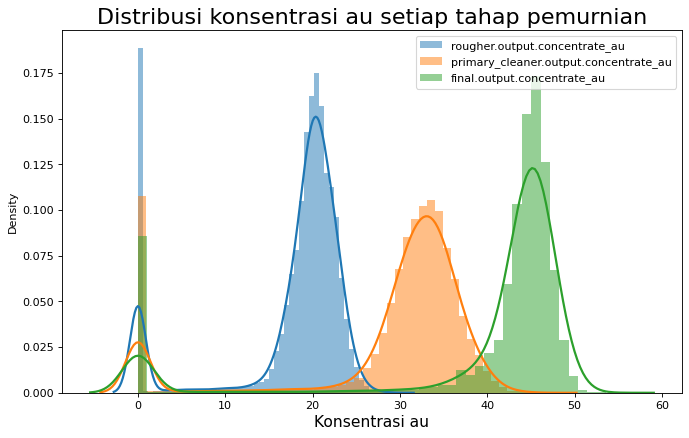

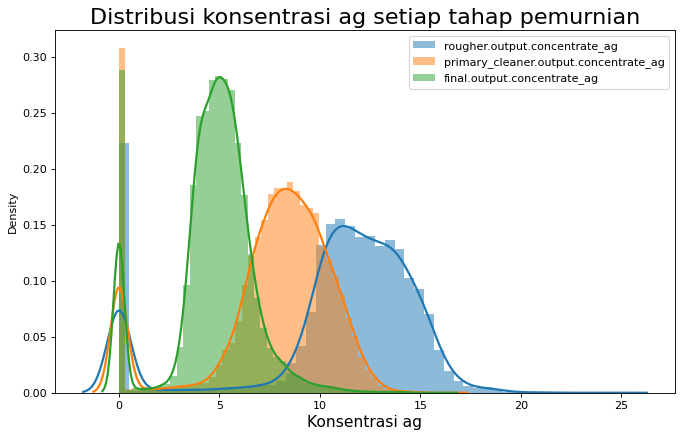

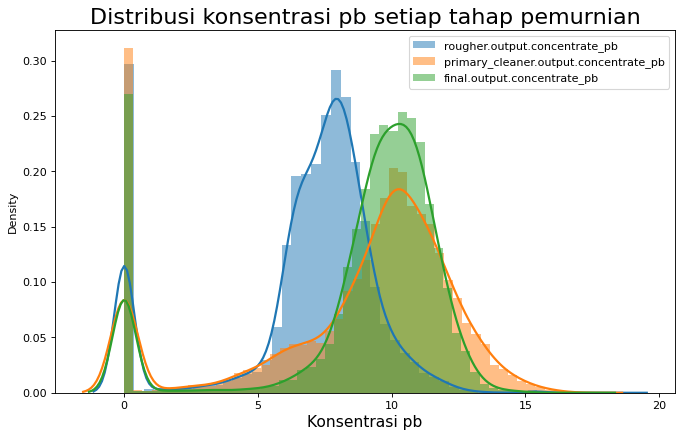

In [27]:
metals = ['au', 'ag', 'pb'] # variabel nama logam 
stage_param = ['rougher.output.concentrate', 
               'primary_cleaner.output.concentrate',
               'final.output.concentrate']

# visualisasi
kws = dict(hist_kws={'alpha': 0.5}, kde_kws={'linewidth':2})
for m in metals:
    plt.figure(figsize=(10,6), dpi=80)
    for features in stage_param:
        sns.distplot(df_full[features+'_'+m], label=features+'_'+m, **kws)
    plt.title(f"Distribusi konsentrasi {m} setiap tahap pemurnian", size=20)
    plt.xlabel('Konsentrasi '+m, size=14)
    plt.legend();

**Kesimpulan**

1. Au - logam (emas) ini nilai konsentrasinya selalu terjadi peningkatan dari tahal awal hingga tahap pemurnian akhir.
2. Ag - logam ini selalu terjadi penurunan konsentrasi logam yang dimulai dari tahap awal hinggal tahap pemurnian akhir.
3. Pb - sedangkan logam ini nilai konsentrasi logam tidak terlalu banyak berubah dari setiap tahap pemurniannya.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Perbandingan Distribusi Partikel Feed Pada Dataset Training dan Test

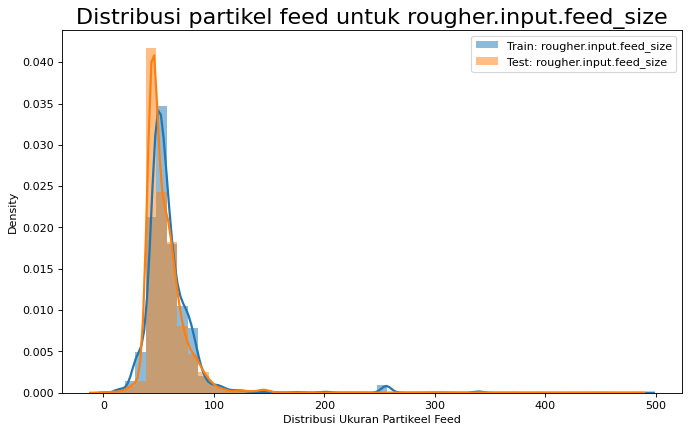

In [28]:
input_feed = [df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size']]
xlabel_ = ['Train: rougher.input.feed_size', 'Test: rougher.input.feed_size']

# distribusi dari ukuran partikel feed (rougher.input.feed_size)
kws = dict(hist_kws={'alpha': 0.5}, kde_kws={'linewidth':2})
plt.figure(figsize=(10,6), dpi=80)
for features, labels in zip(input_feed, xlabel_):
    sns.distplot(features, label=labels, **kws)

plt.title('Distribusi partikel feed untuk rougher.input.feed_size', size=20)
plt.xlabel('Distribusi Ukuran Partikeel Feed')
plt.legend();

In [29]:
# rata-rata partikel feed pada data train
df_train['rougher.input.feed_size'].mean()

60.18859533601633

In [30]:
# rata-rata partikel feed pada data test
df_test['rougher.input.feed_size'].mean()

55.89886568885065

Perbandingan ukuran partikel pakan (rougher.input.feed_size) antara data train dan data test menunjukkan bahwa distribusi keduanya saling tumpang tindih dan cukup serupa. Rata-rata nilai ukuran partikel pada kedua dataset juga hampir sama. Hal ini mengindikasikan bahwa data yang digunakan untuk melatih model mewakili dengan baik dan sesuai dengan data uji. Sebagai hasilnya, kita dapat memiliki keyakinan bahwa model machine learning yang dikembangkan menggunakan data latihan kemungkinan besar akan memberikan prediksi yang akurat saat diujikan pada data uji.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Analysis Total Konsentrasi Semua Logam Pada Setiap Tahapan

Pada tahap ini kita akan menjumlahkan untuk mendapatkan total konsentrasi dari semua logam untuk setiap tahap mulai dari `input.feed`, `output.concentrate` dan yang terakhir `final.output.concentrate`. Kita akan memeriksa apakah terdapat anomali (outlier) dari data kita.

In [31]:
# fungsi untuk visualisasi distribusi
def visualization_box_histplot(data, column):
    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize= (10, 5),
                              gridspec_kw={'height_ratios' : (.15, .85),
                                          'hspace': .05})

    ax1.set_title(f'Distribusi {column}', size=20)
    sns.boxplot(x = data[column], ax=ax1) # boxplot
    ax1.set(xlabel="")
    sns.histplot(data= data[column], ax=ax2, stat='count', kde=True, bins=50) # histogram

    plt.ylabel("")
    plt.show()

**Total `rougher.input.feed`**

In [32]:
# membuat kolom baru dengan menambahkan input feed untuk semua logam
df_full['rougher.input.feed_total'] = df_full[['rougher.input.feed_ag',
                                                 'rougher.input.feed_pb',
                                                 'rougher.input.feed_sol',
                                                 'rougher.input.feed_au']].sum(axis=1)

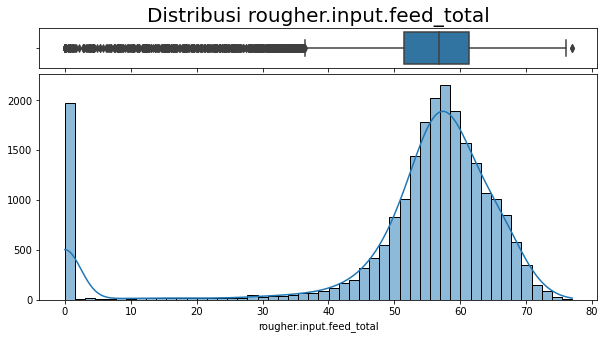

In [33]:
visualization_box_histplot(df_full, 'rougher.input.feed_total')

**Total `rougher.output.concentrate`**

In [34]:
# rougher.input.feed pada dataset full dengan outlier
df_full['rougher.output.concentrate_total'] = df_full[['rougher.output.concentrate_ag',
                                                 'rougher.output.concentrate_pb',
                                                 'rougher.output.concentrate_sol',
                                                 'rougher.output.concentrate_au']].sum(axis=1)


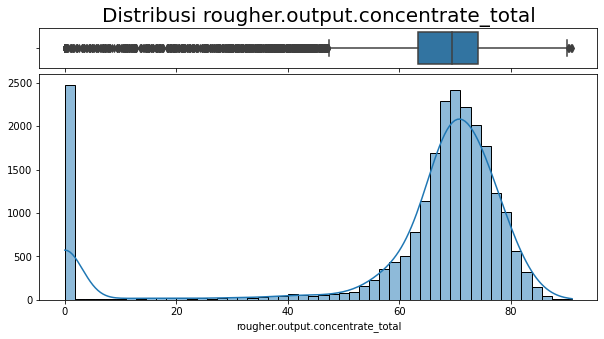

In [35]:
visualization_box_histplot(df_full, 'rougher.output.concentrate_total')

**Total `final.output.concentrate`**

In [36]:
# rougher.input.feed pada dataset full dengan outlier
df_full['final.output.concentrate_total'] = df_full[['final.output.concentrate_ag',
                                                 'final.output.concentrate_pb',
                                                 'final.output.concentrate_sol',
                                                 'final.output.concentrate_au']].sum(axis=1)

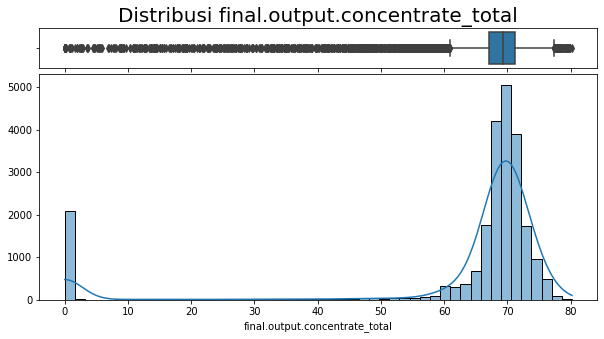

In [37]:
visualization_box_histplot(df_full, 'final.output.concentrate_total')

**Kesimpulan**

Berdasarkan distribusi total konsentrasi untuk semua substansi logam kita mendapati adanya anomali(outlier) yang sangat mempengaruhi model regresi kita nanti. Karena model regresi sangat rentan terhadap outlier, untuk itu kita akan menghapus outlier dari dataset kita.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Menghapus Anomali (Outlier) Pada Data

In [38]:
# fungsi untuk menghapus outlier
def filter_outlier(data, columns):
    previous_shape = (0, 0)
    current_shape = data.shape
    
    while previous_shape != current_shape:
        previous_shape = current_shape
        
        for col in columns:
            Q1 = data[col].quantile(.25)
            Q3 = data[col].quantile(.75)
            IQR = Q3 - Q1
            lower_limit = Q1 - (1.5 * IQR)
            upper_limit = Q3 + (1.5 * IQR)
        
            data = data[(data[col] >= lower_limit) & (data[col] <= upper_limit)]
        
        current_shape = data.shape

    return data

In [39]:
# banyak data dengan outlier
len(df_full)

22716

In [40]:
# kolom yang akan di filter outliernya
columns = ['rougher.input.feed_total','rougher.output.concentrate_total','final.output.concentrate_total']

# memanggil fungsi dan menyimpannya kembali di dataset full
df_full = filter_outlier(df_full, columns)

In [41]:
# dataset fullt setelah dihapus outlier
len(df_full)

17047

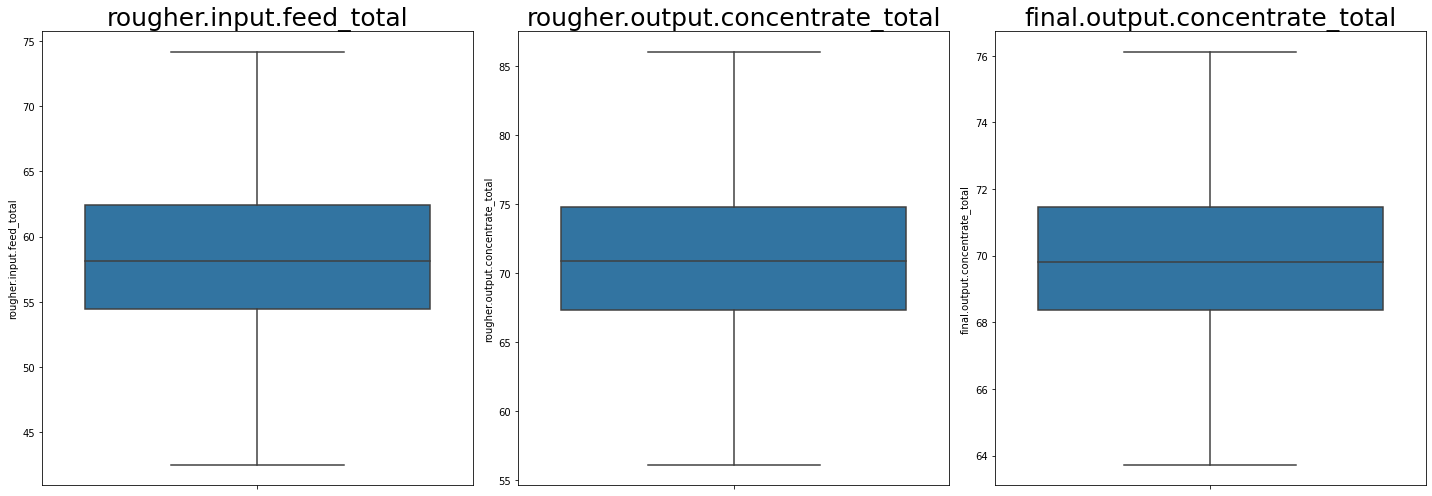

In [42]:
# menampilkan distribusi akhir pada ketiga kolom setelah difilter outlier
fig, axes = plt.subplots(1, 3, figsize=(20, 7)) 
for i, j in zip(columns, axes.flatten()):
    ax = sns.boxplot(data=df_full, y= i, ax= j, order=df_full[i].value_counts().index)
    ax.set_title(f'{i}',size = 25) 
plt.tight_layout()
plt.show()

Oke, kita telah mengatasi outlier. Sebelum kita masuk ke tahap data pre-processing kita akan menghapus kembali 3 kolom fitur yang kita gunakan yaitu:
- `rougher.input.feed_total`
- `rougher.output.concentrate_total`
- `final.output.concentrate_total`

Karena tiga kolom tersebut bukan informasi sebenarnya yang kita dapat dari dataset awal.



In [43]:
df_full = df_full.drop(['rougher.input.feed_total','rougher.output.concentrate_total','final.output.concentrate_total'], axis=1)
df_full.shape

(17047, 87)

Selanjutnya kita akan masuk ke tahap data-preprocessing, dimana kita akan memanipulasi data train dan data test supaya nilainya sesuai dengan dataset full yang sudah bersih tanpa outlier, serta melakukan penskalaan fitur dan pemilihan fitur.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Data Pre-Processing

### Data Cleaning

Pada tahap sebelumnya kita telah menghapus outlier pada dataset full dan dalam melatih model kita sudah mempunyai data train dan data test. Akan tetapi ke-2 dataset tersebut masih memiliki outlier didalam datanya. Untuk itu kita akan melakukan manipulasi data untuk data train dan data test supaya bersih dari outlier sebelum tahap pembuatan model.

In [44]:
# menjadikan kolom date ke index di ke-3 dataset
df_test.set_index('date', inplace=True)
df_train.set_index('date', inplace=True)
df_full.set_index('date', inplace=True)

In [45]:
# filter untuk membersihkan outlier pada data train
df_train = df_full.loc[df_full.index.intersection(df_train.index)].reset_index(drop=True)
df_train.shape

(12253, 86)

Pada kasus ini, `.intersection()` digunakan untuk mendapatkan irisan dari indeks antara df_full dan df_train.index. Ketika kita menggunakan `df_full.index.intersection(df_train.index)`, itu menghasilkan himpunan indeks yang ada di kedua DataFrames tersebut.

Kemudian, `.loc[]` digunakan untuk memilih baris-baris dari df_full yang memiliki indeks yang termasuk dalam irisan indeks yang diperoleh. Dengan demikian, df_train akan berisi baris-baris dari df_full yang ndeksnya juga terdapat di df_train, sesuai dengan hasil dari `.intersection()`.

In [46]:
# filter untuk membersihkan outlier pada data test 
df_test = df_full.loc[df_full.index.intersection(df_test.index)].reset_index(drop=True)
df_test.shape

(4794, 86)

In [47]:
# pencocokan jumlah baris dari data train dan data test terhadap data full
df_train.shape[0] + df_test.shape[0], df_full.shape[0]

(17047, 17047)

Sekarang kedua data kita sudah pas, kita akan melakukan seleksi fitur sebelum pembuatan model.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Membagi Data Features dan Target

In [48]:
# features
features_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
# target
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]
target_test = df_test[['rougher.output.recovery', 'final.output.recovery']]

**Fungsi Untuk Menghitung sMAPE**


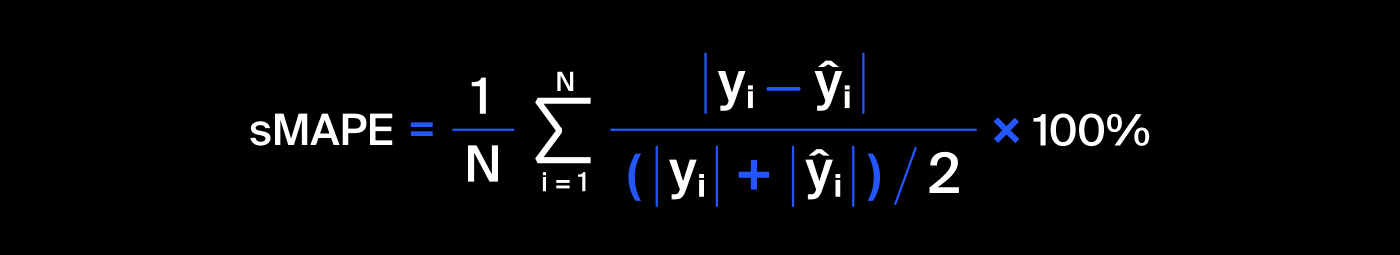

------------
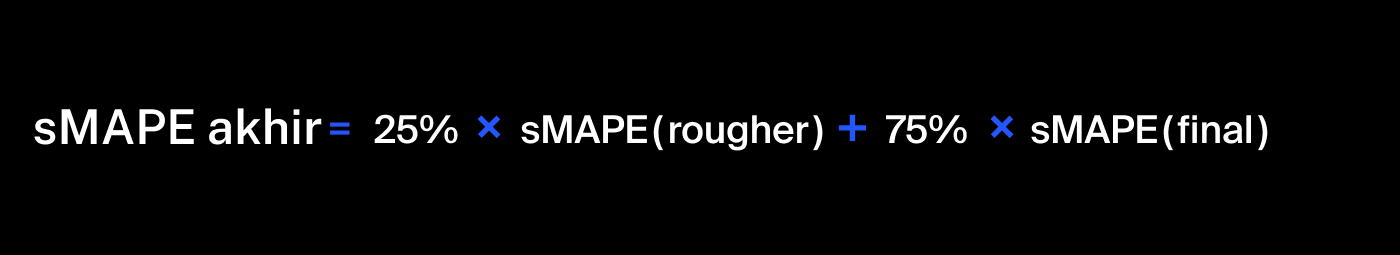

In [49]:
# fungsi smape
def smape__score(actual, predict):
    smape = (np.abs(actual - predict)/((np.abs(actual) + np.abs(predict))/2)).mean()
    return smape

# fungsi smape akhir
def finally_smape(actual, predict):
    smape_out_rougher = smape__score(actual[:,0], predict[:,0])
    smape_out_final = smape__score(actual[:,1], predict[:,1])
    return ((0.25 * smape_out_rougher) + (0.75 * smape_out_final))

# fungsi scoring smape
smape_score = make_scorer(finally_smape)

In [50]:
# penskalaan fitur menggunakan StandardScaler()
scaler = StandardScaler()


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Training Model

### Decision Tree Regressor

Kita akan mencoba melatih model dengan parameter default dan mendapatkan score sMAPE.

In [51]:
# timer
start_time = timeit.default_timer()
# model decision tree dengan parameter default
DTR = Pipeline([
    ('scaler', scaler),
    ('algo', DecisionTreeRegressor(random_state=45))
])
# menggunakan cross_validation berdasarkan scoring smape
DTR_score = cross_val_score(DTR, features_train.values, target_train.values, scoring=smape_score, cv=5)

f'sMAPE Average Score: {DTR_score.mean():.2%}'

'sMAPE Average Score: 3.53%'

In [52]:
f'Waktu eksekusi model Decision Tree: {(timeit.default_timer() - start_time)} detik'

'Waktu eksekusi model Decision Tree: 7.282329863868654 detik'

Algoritma *decision tree regressor* dengan parameter default kita mendapatkan score sMAPE sebanyak 3.5%. Kita akan mencoba tuning hyper-parameters apakah performa model dapat meningkat atau tidak.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

**Tuning hyper-param decision tree**

In [53]:
# menampilkan parameter default
DTR.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('algo', DecisionTreeRegressor(random_state=45))],
 'verbose': False,
 'scaler': StandardScaler(),
 'algo': DecisionTreeRegressor(random_state=45),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'algo__ccp_alpha': 0.0,
 'algo__criterion': 'mse',
 'algo__max_depth': None,
 'algo__max_features': None,
 'algo__max_leaf_nodes': None,
 'algo__min_impurity_decrease': 0.0,
 'algo__min_impurity_split': None,
 'algo__min_samples_leaf': 1,
 'algo__min_samples_split': 2,
 'algo__min_weight_fraction_leaf': 0.0,
 'algo__random_state': 45,
 'algo__splitter': 'best'}

kita akan coba tuning hyper-param dengan mencari max_depth, criterion, max_leaf_nodes, min_samples_leafes dan min_samples_split.

In [54]:
# param_dt_grid = {
#     'algo__max_depth' : np.arange(1, 30),
#     'algo__max_leaf_nodes' : np.arange(1, 20),
#     'algo__min_samples_leaf' : np.arange(1, 20, .5),
#     'algo__min_samples_split' : [0.1, 0.2, 0.5, 0.75, 1, 2, 5, 10, 15, 20, 22, 25]
# }

# DTR_grid = GridSearchCV(estimator=DTR, param_grid=param_dt_grid, scoring=smape_score, cv=5)

# DTR_grid.fit(features_train, target_train)

Okelah, kita menyerah menggunakan gridsearch karena loadingnya lama beneerrr. kita coba manual dengan looping untuk mencari kedalaman pohon (max_depth).

In [55]:
depth_count =[]
smape_scores = []
#

for depth in range(1, 30):
    DTR = Pipeline([
    ('scaler', scaler),
    ('algo', DecisionTreeRegressor(random_state=45, max_depth=depth))
    ])
    # 
    DTR_score = cross_val_score(DTR, features_train.values, target_train.values, scoring=smape_score, cv=5)
    dtr_score_mean = DTR_score.mean()
    
    depth_count.append(depth)
    smape_scores.append(f' {dtr_score_mean:.2%}')

In [56]:
# menampilkan 5 hasil terbaik dalam bentuk dataframe
dt_report = pd.DataFrame({
    'max_depth' : depth_count,
    'smape_score' : smape_scores
})
dt_report.sort_values('smape_score').head()

,max_depth,smape_score
13,14,3.49%
11,12,3.49%
19,20,3.50%
14,15,3.52%
17,18,3.52%


Sepertinya dengan parameter `max_depth` kita dapat peningkatan skor smape sebesar 0.04%. kwkwkwkw jadilah pada ga goyang yakann. Selanjutnya kita akan coba looping untuk parameter `min_samples_split`, apakah performa meningkat atau tidak.

In [57]:
min_leaf_count =[]
smape_scores = []
#

for leaf in range(1, 30):
    DTR = Pipeline([
    ('scaler', scaler),
    ('algo', DecisionTreeRegressor(random_state=45, max_depth=12, min_samples_leaf=leaf))
    ])
    # 
    DTR_score = cross_val_score(DTR, features_train.values, target_train.values, scoring=smape_score, cv=5)
    dtr_score_mean = DTR_score.mean()
    
    min_leaf_count.append(depth)
    smape_scores.append(f' {dtr_score_mean:.2%}')

In [58]:
# menampilkan 5 hasil terbaik dalam bentuk dataframe
dt_report = pd.DataFrame({
    'min_samples_leaf' : min_leaf_count,
    'smape_score' : smape_scores
})
dt_report.sort_values('min_samples_leaf').head()

,min_samples_leaf,smape_score
0,29,3.49%
26,29,3.85%
25,29,3.87%
24,29,3.83%
23,29,3.80%


Oke sepertinya cukup sampai disini saja, hasil maksimalnya adalah dengan mengatur parameter `max_depth` = 12 kita mendapatkan score `sMAPE` yang rendah yaitu sebesar `3.49%`. 

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Random Forest Regressor

In [59]:
# timer
start_time = timeit.default_timer()
# model random forest dengan parameter default
RFR = Pipeline([
    ('scaler', scaler),
    ('algo', RandomForestRegressor(random_state=45))
])
# menggunakan cross_validation berdasarkan scoring smape
RFR_score = cross_val_score(RFR, features_train.values, target_train.values, scoring=smape_score, cv=5)

f'sMAPE Average Score: {RFR_score.mean():.2%}'

'sMAPE Average Score: 2.28%'

In [60]:
f'Waktu eksekusi model: {(timeit.default_timer() - start_time)} detik'

'Waktu eksekusi model: 423.43107637320645 detik'

**Tuning hyper-param random forest**

In [61]:
n_estimator_count =[]
smape_scores = []
#

for estimator in range(1, 30):
    RFR = Pipeline([
    ('scaler', scaler),
    ('algo', RandomForestRegressor(random_state=45, n_estimators=estimator))
    ])
    # 
    RFR_score = cross_val_score(RFR, features_train.values, target_train.values, scoring=smape_score, cv=5)
    rfr_score_mean = RFR_score.mean()
    
    n_estimator_count.append(estimator)
    smape_scores.append(f' {rfr_score_mean:.2%}')

In [62]:
# menampilkan 5 hasil terbaik dalam bentuk dataframe
rf_report = pd.DataFrame({
    'n_estimators' : n_estimator_count,
    'smape_score' : smape_scores
})
rf_report.sort_values('n_estimators').head()

,n_estimators,smape_score
0,1,4.28%
1,2,3.42%
2,3,3.09%
3,4,2.95%
4,5,2.81%


Sepertinya dengan algoritma RandomForest() kita mendapatkan hasil maksimal dengan menggunakan parameter default, namum proses eksekusi algoritma ini cukup lama.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Linear Regression

In [66]:
# timer
start_time = timeit.default_timer()
# model random forest dengan parameter default
LR = Pipeline([
    ('scaler', scaler),
    ('algo', LinearRegression())
])
# menggunakan cross_validation berdasarkan scoring smape
LR_score = cross_val_score(LR, features_train.values, target_train.values, scoring=smape_score, cv=5)

f'sMAPE Average Score: {LR_score.mean():.2%}'

'sMAPE Average Score: 3.41%'

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- belum ada kesimpulan umum ya

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Sepertinya ada kendala dijaringan kak, semalem udah tak buat kesimpulan umum sih. oke baik kak di buat lagi
</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

- sepertinya masih belum ada ya
    - coba sebelum di submit di save2 berulang sampai di bagian `last checkpoint` menjadi `a few seconds ago`

</div>

## Uji Coba Pada Data Test

In [63]:
# timer
start_time = timeit.default_timer()
# model random forest dengan parameter default
RFR = Pipeline([
    ('scaler', scaler),
    ('algo', RandomForestRegressor(random_state=45))
])

# menggunakan cross_validation berdasarkan scoring smape
RFR_score_test = cross_val_score(RFR, features_test.values, target_test.values, scoring=smape_score, cv=5)

f'sMAPE Average Score: {RFR_score_test.mean():.2%}'

'sMAPE Average Score: 1.79%'

## Kesimpulan Umum

- Proses analisis berhasil merancang model untuk memprediksi jumlah emas yang diekstraksi atau diperoleh dari bijih emas.Analisis data eksplorasi awal (EDA) melibatkan pemahaman struktur kumpulan data, mengidentifikasi fitur yang relevan, dan membersihkan data untuk menangani nilai yang hilang, outlier, dan anomali.
- Konsentrasi emas (Au) cenderung meningkat seiring dengan kemajuan tahap produksi, menunjukkan proses produksi yang berfungsi dengan baik untuk logam emas. Namun, logam (Pb) tidak menunjukkan peningkatan konsentrasi yang signifikan selama proses pemurnian.  Sedangkan logam (Ag) selalu terjadi penurunan konsentrasi logam yang dimulai dari tahap awal hinggal tahap pemurnian akhir
- Rekayasa fitur dilakukan untuk menggabungkan konsentrasi logam emas, perak, dan timbal pada setiap tahap produksi.
- Tiga model regresi (Decision Tree, Random Forest, dan Linear Regression) dievaluasi menggunakan cross-validation, dengan upaya penyetelan hyperparameter untuk meningkatkan kinerja. Model Random Forest tanpa penyetelan hyperparameter memberikan skor sMAPE terbaik.
- Model Random Forest di uji dalam data test, dan hasilnya bagus dimana nilai sMAPE sebesar 1.79%  akan tetapi memiliki waktu eksekusi yang cukup lama.